In [1]:
'''
Author: Santoshkumar Tongli.
'''

#package
import matplotlib.pyplot as plt
import cv2
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import pandas as pd




import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import pandas as pd
import zipfile
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from joblib import dump

from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
class PCAFeatureExtractor:
    def __init__(self, n_components=100):
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=n_components)

    def fit_transform_train(self, train_data):
        # Flatten the training images
        train_data_flattened = train_data.reshape((train_data.shape[0], -1))
        
        # Standardize the flattened training data
        train_standardized = self.scaler.fit_transform(train_data_flattened)
        
        # Fit and transform the standardized training data using PCA
        train_pca = self.pca.fit_transform(train_standardized)
        
        print(f"Original shape: {train_data_flattened.shape}")
        print(f"Reduced shape: {train_pca.shape}")
        
        return train_pca

    def transform_test(self, test_data):
        # Flatten the test images
        test_data_flattened = test_data.reshape((test_data.shape[0], -1))
        
        # Standardize the flattened test data using the scaler fitted on the training data
        test_standardized = self.scaler.transform(test_data_flattened)
        
        # Transform the standardized test data using the PCA fitted on the training data
        test_pca = self.pca.transform(test_standardized)
        
        print(f"Original shape: {test_data_flattened.shape}")
        print(f"Reduced shape: {test_pca.shape}")
        
        return test_pca

In [3]:
class Classifier:
    def __init__(self, classifier, classifier_name, dataset_name):
        self.classifier = classifier
        self.classifier_name = classifier_name
        self.dataset_name = dataset_name

    def train(self, train_data, train_label):
        print(f"Training the {self.classifier_name} based Classifer using {self.dataset_name} features.")
        # Train the classifier on training data
        start_time = time.time()
        self.classifier.fit(train_data, train_label)
        elapsed_time = time.time() - start_time
        print(f"Training completed in {elapsed_time:.2f} seconds.")

    def evaluate(self, test_data, y_test):

        y_pred = self.classifier.predict(test_data)

        # Calculate the accuracy of the predictions
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy of the Model: {accuracy * 100:.2f}%")
        
        # Calculate metrics
        precision_weighted = precision_score(y_test, y_pred, average='weighted')
        recall_weighted = recall_score(y_test, y_pred, average='weighted')
        f1_weighted = f1_score(y_test, y_pred, average='weighted')

        precision_macro = precision_score(y_test, y_pred, average='macro')
        recall_macro = recall_score(y_test, y_pred, average='macro')
        f1_macro = f1_score(y_test, y_pred, average='macro')

        # Print the metrics

        print(f"Accuracy: {accuracy:0.2f}")
        print(f"Precision (Weighted): {precision_weighted:0.2f}")
        print(f"Recall (Weighted): {recall_weighted:0.2}")
        print(f"F1 Score (Weighted): {f1_weighted:0.2}")
        print(f"Precision (Macro): {precision_macro:0.2f}")
        print(f"Recall (Macro): {recall_macro:0.2}")
        print(f"F1 Score (Macro): {f1_macro:0.2}")
        

        # Detailed classification report

        print("\nClassification Report:\n", classification_report(y_test, y_pred))
        print("---------------------------------------\n\n")

        # Compute the confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Visualize the confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        title_name = f'Confusion Matrix - {accuracy * 100:.2f}%'
        plt.title(title_name)
        file_name = f'cf_{self.classifier_name}_{self.dataset_name}.png'
        plt.savefig(file_name)

In [4]:
TrainData = pd.read_csv("./processed_data/NSL-KDD/NSL-KDD_Processed_Train.csv")
TestData = pd.read_csv("./processed_data/NSL-KDD/NSL-KDD_Processed_Test.csv")

In [5]:
TrainData

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,0,232,8153,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
4,0,199,420,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
125969,8,105,145,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
125970,0,2231,384,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
125971,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


In [6]:
TestData

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
1,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
2,2,12983,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,20,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,1,0,15,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
22540,0,317,938,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
22541,0,54540,8314,0,0,2,0,1,1,0,...,False,False,False,False,False,False,False,False,True,False
22542,0,42,42,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer, MaxAbsScaler


# Initialize MinMaxScaler
# scaler = MinMaxScaler()
# scaler = MinMaxScaler()
scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = PowerTransformer(method='yeo-johnson')  # or method='box-cox'
# scaler = QuantileTransformer(output_distribution='normal')
# scaler = MaxAbsScaler()





X_train = TrainData.drop('attack', axis=1)

# Normalize the data
normalized_data = scaler.fit_transform(X_train)

# Convert the normalized data back to a DataFrame (if needed)
normalized_df = pd.DataFrame(normalized_data, columns=X_train.columns)



X_test = TestData.drop('attack', axis=1)

# Normalize the data
normalized_test_data = scaler.fit_transform(X_test)

# Convert the normalized data back to a DataFrame (if needed)
normalized_test_data = pd.DataFrame(normalized_test_data, columns=X_test.columns)

In [8]:
input_columns = X_train.columns

In [9]:

from sklearn.preprocessing import LabelEncoder
# Separate features and labels
X_train = normalized_df.values # TrainData.drop('attack', axis=1)
# y_train = pd.get_dummies(TrainData['attack'])

X_test = normalized_test_data.values #TestData.drop('attack', axis=1).values
# y_test = pd.get_dummies(TestData['attack'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical column numerically
y_train = label_encoder.fit_transform(TrainData['attack'])
y_test = label_encoder.fit_transform(TestData['attack'])

In [10]:
# y_train = pd.get_dummies(TrainData['attack']).values
# y_test = pd.get_dummies(TestData['attack']).values

In [11]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler_fn=ReduceLROnPlateau
scheduler_params=dict(
    mode='min',  # Assumes lower loss is better
    factor=0.1,  # New lr = lr * factor
    patience=10,
    verbose=True
)

In [12]:
from torch.optim import SGD

optimizer_fn=SGD,
optimizer_params=dict(lr=1e-2, momentum=0.9)

In [13]:
y_train

array([4, 4, 0, ..., 4, 0, 4])

In [14]:
y_unique = set(y_train)

class_counts = []
for ele in y_unique:
    print("ele: ", ele)
    class_counts.append(np.sum(y_train == ele))

print(class_counts)

ele:  0
ele:  1
ele:  2
ele:  3
ele:  4
[45927, 11656, 995, 52, 67343]


In [15]:
import torch
import torch.nn.functional as F

def compute_class_weights(class_counts):
    """
    Compute class weights inversely proportional to class frequencies.
    Args:
    class_counts (list or ndarray): List or array containing the count of samples for each class.
    Returns:
    torch.Tensor: Tensor containing weights for each class.
    """
    # Convert counts to a tensor
    class_counts = torch.tensor(class_counts, dtype=torch.float32)
    # Compute weights as the inverse of the frequency
    total = class_counts.sum()
    class_weights = total / class_counts
    # Normalize weights so that the minimum weight is 1.0
    class_weights /= class_weights.min()
    return class_weights

In [16]:
weights = compute_class_weights(class_counts)
print(weights)

tensor([1.4663e+00, 5.7775e+00, 6.7681e+01, 1.2951e+03, 1.0000e+00])


In [17]:
def weighted_cross_entropy_loss(model_output, target):
    # Cross-entropy loss for multi-class classification with weights
    return F.cross_entropy(model_output, target, weight=weights)

In [29]:
y_train

array([4, 4, 0, ..., 4, 0, 4])

In [20]:
# TabNetPretrainer
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# unsupervised_model = TabNetPretrainer(
#     optimizer_fn=torch.optim.Adam,
#     optimizer_params=dict(lr=2e-2),
#     mask_type='sparsemax',
#     device_name = 'cpu' # "sparsemax"
# )

# unsupervised_model.fit(
#     X_train=X_train,
#     eval_set=[X_test],
#     pretraining_ratio=0.8,
#     max_epochs=15,
# )

clf = TabNetClassifier(
    n_d = 64,
    n_a = 64,
    n_steps = 6,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, # how to use learning rate scheduler
                      "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax',
    device_name = 'cpu' # This will be overwritten if using pretrain model
)

history = clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=30,
    compute_importance = True,
    loss_fn = torch.nn.CrossEntropyLoss(weight = weights)
#     patience=50,  # Early stopping
#     batch_size=256,  # Depends on your GPU capacity
#     virtual_batch_size=64,  # Size of the mini batches for ghost batch normalization
#     num_workers=0,  # Based on your system capabilities
#     drop_last=False  # Drop the last incomplete batch if it's smaller than the batch size
)

/s/chopin/l/grad/tskumar/.local/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.64028 | train_accuracy: 0.89949 | valid_accuracy: 0.70866 |  0:00:14s
epoch 1  | loss: 0.68873 | train_accuracy: 0.9234  | valid_accuracy: 0.75608 |  0:00:27s
epoch 2  | loss: 0.39761 | train_accuracy: 0.94843 | valid_accuracy: 0.70671 |  0:00:41s
epoch 3  | loss: 0.42918 | train_accuracy: 0.97369 | valid_accuracy: 0.79582 |  0:00:54s
epoch 4  | loss: 0.34196 | train_accuracy: 0.98028 | valid_accuracy: 0.74689 |  0:01:08s
epoch 5  | loss: 0.28108 | train_accuracy: 0.98366 | valid_accuracy: 0.78043 |  0:01:21s
epoch 6  | loss: 0.26749 | train_accuracy: 0.98255 | valid_accuracy: 0.80567 |  0:01:35s
epoch 7  | loss: 0.23396 | train_accuracy: 0.98314 | valid_accuracy: 0.7944  |  0:01:49s
epoch 8  | loss: 0.26628 | train_accuracy: 0.98438 | valid_accuracy: 0.80487 |  0:02:02s
epoch 9  | loss: 0.23558 | train_accuracy: 0.98474 | valid_accuracy: 0.81645 |  0:02:15s
epoch 10 | loss: 0.21849 | train_accuracy: 0.98318 | valid_accuracy: 0.78611 |  0:02:28s
epoch 11 | loss: 0.23

/s/chopin/l/grad/tskumar/.local/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [21]:
# from pytorch_tabnet.tab_model import TabNetClassifier
# import torch

# torch.set_default_tensor_type('torch.FloatTensor')
# # Instantiate and train the TabNet model
# clf = TabNetClassifier(n_d = 64,
#                        n_a = 64,
#                        n_steps = 5,
#                         optimizer_fn= SGD, #torch.optim.Adam,
#                        optimizer_params= optimizer_params, #dict(lr=1e-3),
#                        scheduler_params= scheduler_params, #{"step_size":10, "gamma":0.9},
#                        scheduler_fn = scheduler_fn, #torch.optim.lr_scheduler.StepLR,
#                        mask_type='sparsemax',
#                        device_name = 'cpu')  # Can also use 'sparsemax'

# clf.fit(
#   X_train, y_train,
#   eval_set=[(X_test, y_test)],
#   eval_name=['eval'],
#   eval_metric=['accuracy'],
#   max_epochs=5,
#   patience=50,  # Early stopping
#   batch_size=256,  # Depends on your GPU capacity
#   virtual_batch_size=64,  # Size of the mini batches for ghost batch normalization
#   num_workers=0,  # Based on your system capabilities
#   drop_last=False  # Drop the last incomplete batch if it's smaller t han the batch size
# )


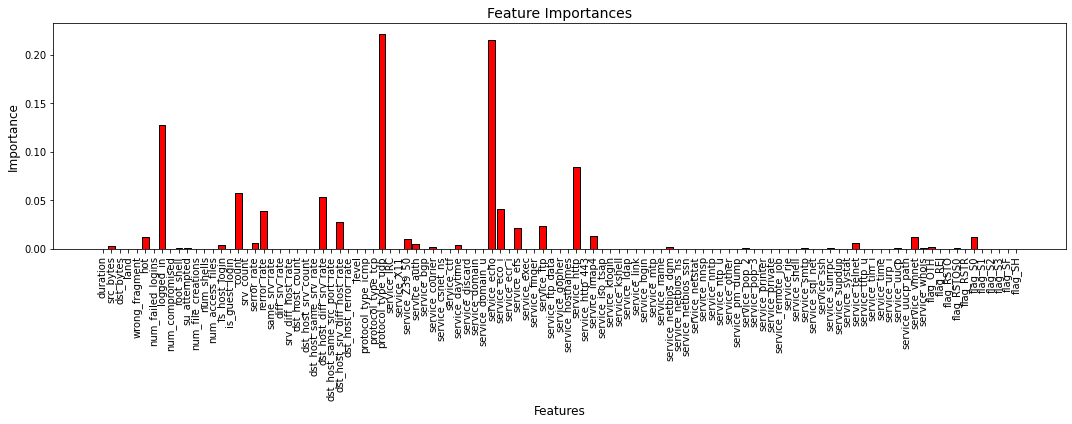

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clf.feature_importances_ contains the feature importances

feature_importances = clf.feature_importances_

# Assuming 'input_column_name' is a list of feature names corresponding to the importances

input_column_name = ['Feature1', 'Feature2', 'Feature3', ...]  # Update with actual feature names

# Plotting the bar graph

plt.figure(figsize=(15, 6))  # Increased width of the graph
plt.bar(input_columns, feature_importances, color='red', edgecolor='black')  # Add red edge color
plt.xlabel('Features', fontsize=12)  # Bigger font size for better readability
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importances', fontsize=14)
plt.xticks(ticks=np.arange(len(input_columns)), labels=input_columns, rotation=90)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjusts subplots to give some padding and prevent overlap
plt.show()


In [26]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred = clf.predict(X_test)

In [27]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



# Convert predicted probabilities to class labels using argmax
y_pred_class = y_pred

# Check if y_test is one-hot encoded and convert if necessary
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_test_class = np.argmax(y_test, axis=1)
else:
    y_test_class = y_test

# Dynamically determine the number of classes and set appropriate class labels
unique_classes = np.unique(np.concatenate((y_test_class, y_pred_class)))
class_names = [f"Class {label+1}" for label in unique_classes]

# Calculate classification report
classification_rep = classification_report(y_test_class, y_pred_class, target_names=class_names)


# Calculate metrics
precision_weighted = precision_score(y_test_class, y_pred_class, average='weighted')
recall_weighted = recall_score(y_test_class, y_pred_class, average='weighted')
f1_weighted = f1_score(y_test_class, y_pred_class, average='weighted')

precision_macro = precision_score(y_test_class, y_pred_class, average='macro')
recall_macro = recall_score(y_test_class, y_pred_class, average='macro')
f1_macro = f1_score(y_test_class, y_pred_class, average='macro')

# Print the metrics

print(f"Accuracy: {accuracy:0.2f}")
print(f"Precision (Weighted): {precision_weighted:0.2f}")
print(f"Recall (Weighted): {recall_weighted:0.2}")
print(f"F1 Score (Weighted): {f1_weighted:0.2}")
print(f"Precision (Macro): {precision_macro:0.2f}")
print(f"Recall (Macro): {recall_macro:0.2}")
print(f"F1 Score (Macro): {f1_macro:0.2}")


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy}")  # Ensure accuracy is calculated or passed correctly
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)
print("---------------------------------------\n\n\n\n\n")

Accuracy: 0.8164478353442157
Accuracy: 81.64%
Accuracy: 0.82
Precision (Weighted): 0.85
Recall (Weighted): 0.82
F1 Score (Weighted): 0.81
Precision (Macro): 0.69
Recall (Macro): 0.66
F1 Score (Macro): 0.62
Evaluation Metrics:
Accuracy: 0.8164478353442157
Classification Report:
              precision    recall  f1-score   support

     Class 1       0.92      0.85      0.88      7460
     Class 2       0.80      0.78      0.79      2421
     Class 3       0.91      0.30      0.45      2885
     Class 4       0.05      0.42      0.10        67
     Class 5       0.78      0.96      0.86      9711

    accuracy                           0.82     22544
   macro avg       0.69      0.66      0.62     22544
weighted avg       0.85      0.82      0.81     22544

Confusion Matrix:
[[6330  110    0    7 1013]
 [ 393 1883   33   19   93]
 [  57  145  872  386 1425]
 [   3    2   16   28   18]
 [  84  227   33   74 9293]]
---------------------------------------







In [28]:
y_pred

array([0, 0, 4, ..., 4, 4, 1])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_classification

# Generate a sample dataset with 5 classes

X = y_pred
y = y_test
# Compute t-SNE embedding

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Plotting the result

plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    indices = y == i
    plt.scatter(X_embedded[indices, 0], X_embedded[indices, 1], c=colors[i], label=f'Class {i+1}', alpha=0.7)

plt.legend()
plt.title('t-SNE visualization of 5 classes')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()